# Eezzy Regression
### Analyze a dataset of house prices with Eezzy functionality
Libraries like scikit-learn can easily automate your machine learning workflow. Within this notebook we'll perform Exploratory Data Analysis on sold houses from 2014 to 2015, located in King County, USA.

First we'll need to import the necessary libraries.
- NumPy and Pandas provide essential fundamental data manipulation tools
- Data Handler, Spot Checker, and Model Improvement all abstract various, thus allowing for rapid model prototyping and fleshing out a good idea of what will suit our purposes.

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import data_handler as dh
import spot_checker
import model_improvement
pd.options.display.max_columns = 100

## Data Cleaning
Before getting our hands dirty with actual machine learning, we should first develop a understanding of the data at hand. A couple of things must be addressed at first:
- Is there missing data?
- Do some features have high collinearity?
- What format is the data in?
Data Handler will let us factor all of these and more into consideration as we begin exploring the dataset

---
First, we'll import the dataset using panda's `read_csv`, which gives us a pandas `DataFrame` object for later. Then, we'll remove empty rows, and get a initial look at the data.

In [39]:
df = pd.read_csv('../../data/kc_house_data.csv')
df = dh.remove_empty(df)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


_Looks like most of the data is immediately usable (numbers), although the date is in a string format._

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


_The average house in King County is $540,000, with around 3 bedrooms, 2 bathrooms, and 2080 sq ft._

Potentially Unsafe Features (High Collinearity):
The features bathrooms and sqft_living have a correlation rating of 0.7546652789673779
The features sqft_living and grade have a correlation rating of 0.7627044764584873
The features sqft_living and sqft_above have a correlation rating of 0.8765965986813212
The features sqft_living and sqft_living15 have a correlation rating of 0.7564202590172227
The features grade and sqft_above have a correlation rating of 0.7559229376236656


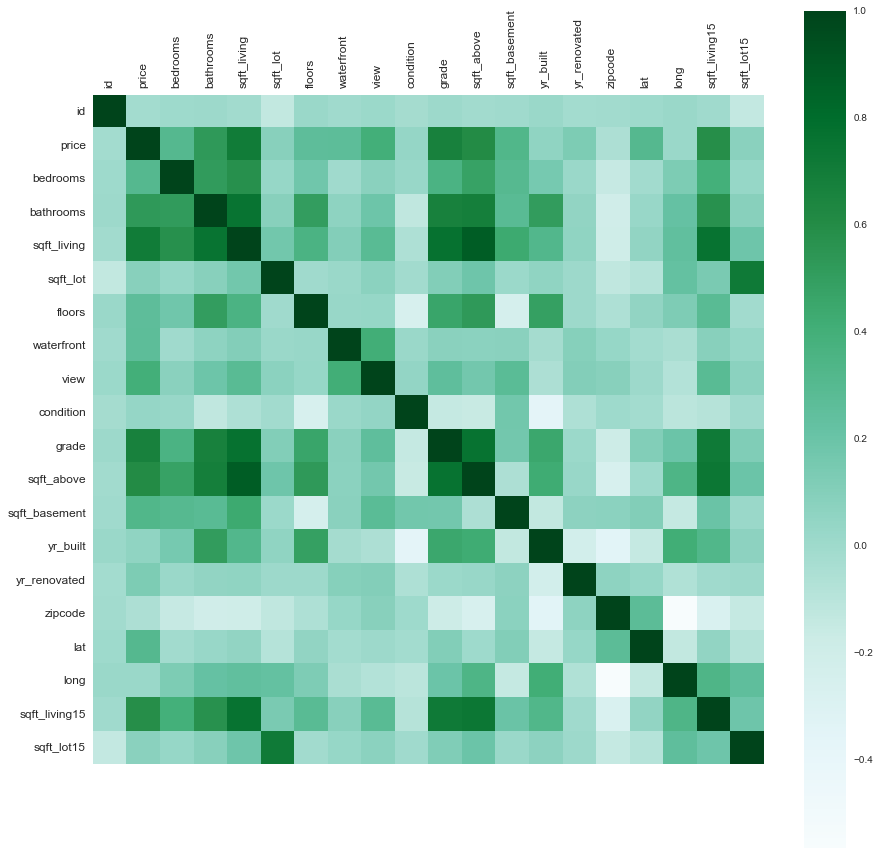

In [42]:
dh.assess_collinearity(df)

### Initial Impressions

Looks like we'll need to watch out for high correlations between `sqft_living` and `sqft_above`. Additionally, we learned that our data is in an excellent format for the most part, although the feature `yr_renovated` is almost entirely empty, and could probably be best combined with another.

---

## Visualize the patterns
Now that we have a sense of what the dataset is like, let's visualize how the house price is dependent on various features, and what trends we may see. Data Handler provides functionality for easy plotting.

`plot` takes a `DataFrame`, a tuple of feature names to be compared, and additional kwargs, like the target graph type and an option for reducing displayed data points.

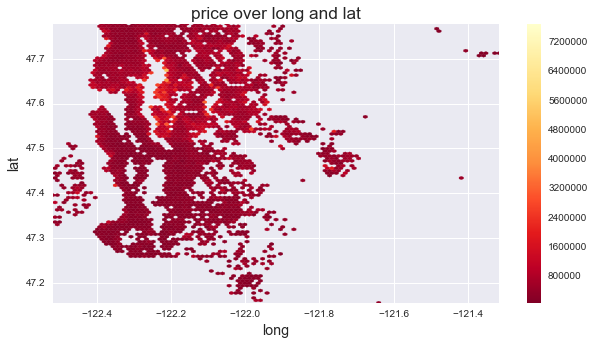

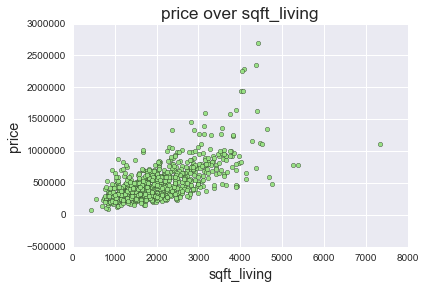

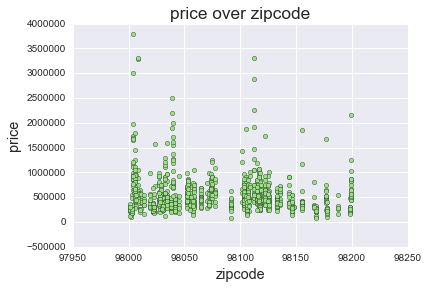

In [43]:
# Giving three feature names and setting kind to heat will create a heatmap with the color 
# dependant on the third feature name
dh.plot(df, ('long', 'lat', 'price'), kind='heat')
# Because the dataset has over 21,000 datapoints, we'll reduce the number of displayed
# data points to make a more legible scatter plot
dh.plot(df, ('sqft_living', 'price'), reduce_size_to=750)
dh.plot(df, ('zipcode', 'price'), reduce_size_to=1000)

### Plotting Averages
`plot_mean_over_x` will display the mean y value (in this case price) over x, which can also be a categorical feature.

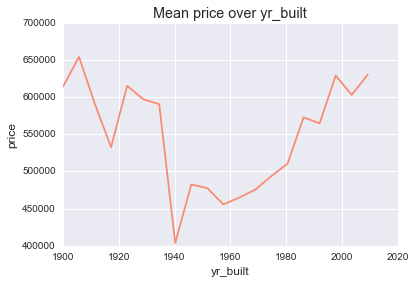

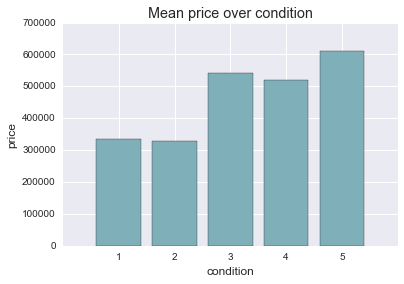

/Users/chase/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/chase/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


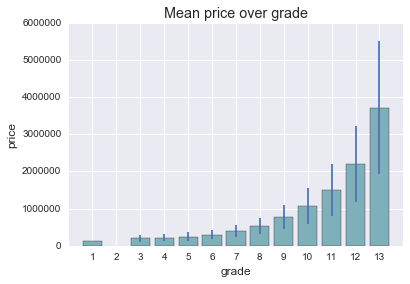

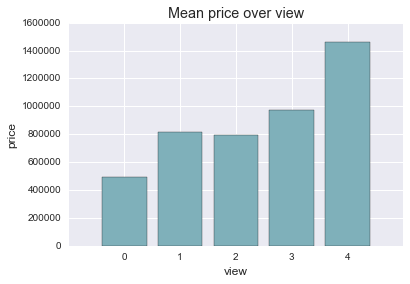

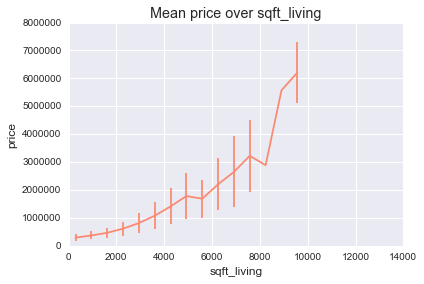

In [44]:
dh.plot_mean_over_x(df, 'yr_built', 'price', line=True)
dh.plot_mean_over_x(df, 'condition', 'price', x_type='categorical')
dh.plot_mean_over_x(df, 'grade', 'price', x_type='categorical', error=True)
dh.plot_mean_over_x(df, 'view', 'price', x_type='categorical')
dh.plot_mean_over_x(df, 'sqft_living', 'price', line=True, error=True)

_Looks like the 1940s was a rough time to have a house_

_Grade has an excellent fit to average price, as does square feet of living_

## Slimming Down the Number of Features
### The Curse of Dimensionality
Our dataset has several features that are rather redundant or display no correlation with price. In order to improve the accuracy of the model, we'll remove or alter these features that could otherwise distract the model and cause it to underperform.

In [45]:
# First off, we don't need separate features for year built and year renovated
# especially considering most houses haven't been renovated, meaning that
# the renovated year feature is largely useless. So instead, we'll combine the two

years_built = df['yr_built'].values
years_ren = df['yr_renovated'].values
def update_years(built, ren):
    return built if built > ren else ren
update_years = np.vectorize(update_years)

new_feature = update_years(years_built, years_ren)


In [46]:
# Next we'll remove data points that aren't relevant for predicting the price
train_df = df.drop([
        'id',
        'date',
        'yr_renovated',
        'view', # no good explanation for what this feature actually is
        'condition', # grade offers a better insight than this does
        'zipcode', # we already have longitude, latitude, and near-15 for geographic data
        'sqft_above'
    ], axis=1)
# and finally, add in the newly composed feature
train_df['yr_built'] = new_feature
train_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,7,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,7,400,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,6,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,7,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,8,0,1987,47.6168,-122.045,1800,7503


_That's a lot better - now the data is completely prepped and ready to be trained upon_

## Quickly Identifying Well-Performing Models
The library Spot Checker provides the method `spot_check` that'll automatically select and test several models on the given dataset. 

In [47]:
X = train_df.drop(['price'], axis=1).values
y = train_df['price'].values
spot_checker.spot_check(X, y, 'regression')
# the score metric here is R^2 
# the closer to 1, the better

Ordinary Least Squares: 0.670
Ridge (alpha 0.1): 0.670
Ridge (alpha 1.0): 0.670
Lasso (alpha 0.1): 0.670
Lasso (alpha 1.0): 0.670
ElasticNet (alpha 0.1): 0.622
ElasticNet (alpha 1.0): 0.581
Decision Tree: 0.748
K-Nearest Neighbors: 0.475


## Selecting a Model and Refining Hyperparameters
---
Looks like decision trees fit the data the best. We'll import the model `DecisionTreeRegressor`, as it performed considerably better than others in the brief spotchecking. 

In order to get optimal results from the Decision Tree model, we'll try tuning the `max_depth` and `max_features` hyperparameters in order to get the best possible results. To do this we'll use Model Improvement, which offers ways the method `check_hparams` that'll automatically try all possible combinations of hyperparameters and rank the resulting scores.

In [48]:
test_params = {
    'max_depth': np.arange(2, 20),
    'max_features': ('auto', 'sqrt')
}
from sklearn.tree import DecisionTreeRegressor
model_improvement.check_hparams(DecisionTreeRegressor, test_params, X, y, view=30)
# view is how many results we want printed out

,max_depth,max_features,score
0,11,auto,0.788842
1,10,auto,0.788576
2,9,auto,0.782862
3,8,auto,0.775935
4,12,auto,0.774387
5,14,auto,0.768861
6,13,auto,0.766511
7,7,auto,0.762906
8,15,auto,0.760030
9,16,auto,0.759723


## Conclusion
---
It looks like a Decision Tree Regressor model is our best bet, and optimized with 11 maximum splits and setting the mechanism for determining maximum number of features to take into consideration at any given time to auto. Thus, we can get a R^2 score of **0.788842**